<a href="https://colab.research.google.com/github/GokuKrish24/Heart_attack_prediction/blob/main/Heart_Attack_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.metrics import classification_report
import time

In [ ]:
method = []
score = []
t = []
data = pd.read_csv('heart.csv')
x = data.drop('HeartDiseaseorAttack',axis=True)
y = data['HeartDiseaseorAttack']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.21)

In [ ]:
data.shape

(253680, 22)

In [ ]:
data.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
data.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

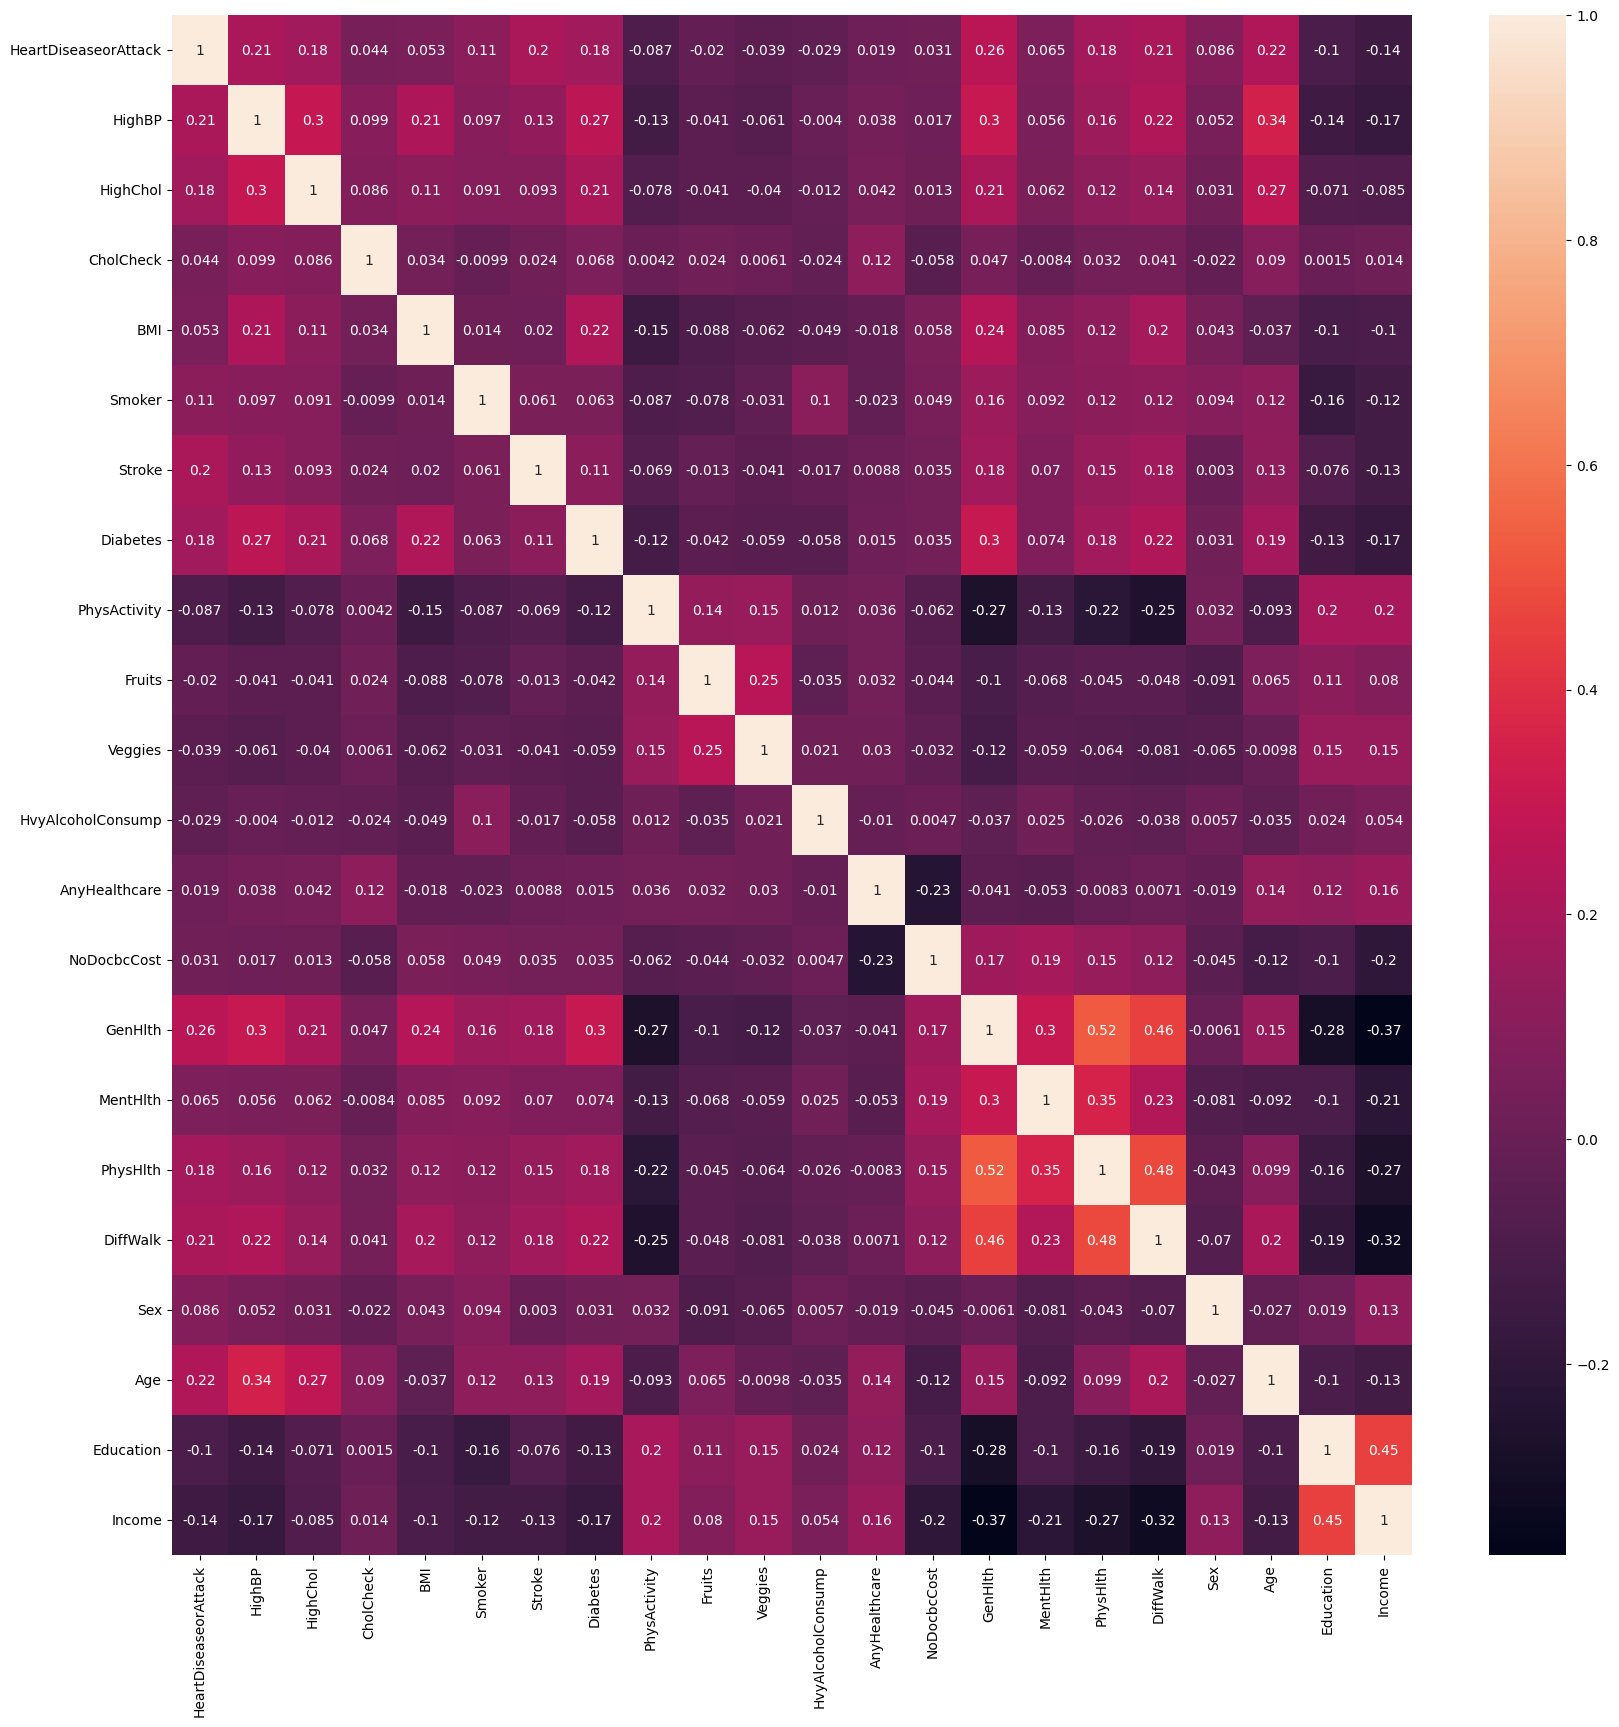

In [ ]:
correlation = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
plt.show()

In [ ]:
# 1.KNN
s = time.time()
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
knn_a = accuracy_score(y_test,y_pred)
score.append(knn_a)
e = time.time()
t.append(abs(e - s))
method.append('KNN')
print("Classification Report KNN:")
print(classification_report(y_test, y_pred))

Classification Report KNN:
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94     48304
         1.0       0.30      0.15      0.20      4969

    accuracy                           0.89     53273
   macro avg       0.61      0.56      0.57     53273
weighted avg       0.86      0.89      0.87     53273



In [ ]:
# 2.DECISION TREES
s = time.time()
dt_c = DecisionTreeClassifier()
dt_c.fit(x_train,y_train)
y_pred = dt_c.predict(x_test)
dt_a = accuracy_score(y_test,y_pred)
score.append(dt_a)

e = time.time()
t.append(abs(e - s))
method.append('DECISION TREES')
print("Classification Report DECISION TREES:")
print(classification_report(y_test, y_pred))

Classification Report DECISION TREES:
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92     48304
         1.0       0.24      0.28      0.26      4969

    accuracy                           0.85     53273
   macro avg       0.58      0.59      0.59     53273
weighted avg       0.86      0.85      0.86     53273



In [ ]:
# 3.RANDOM FOREST CLASSIFIER
s = time.time()
rf_c = RandomForestClassifier()
rf_c.fit(x_train,y_train)
y_pred = rf_c.predict(x_test)
rf_a = accuracy_score(y_pred,y_test)
score.append(rf_a)
e = time.time()
t.append(abs(e - s))
method.append('DECISION TREES')
print("Classification Report RANDOM FOREST CLASSIFIER:")
print(classification_report(y_test, y_pred))

Classification Report RANDOM FOREST CLASSIFIER:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     48304
         1.0       0.42      0.11      0.18      4969

    accuracy                           0.90     53273
   macro avg       0.67      0.55      0.56     53273
weighted avg       0.87      0.90      0.88     53273



In [ ]:
# 4.SUPPORT VECTOR MACHINES

s = time.time()
svm_c = SVC()
svm_c.fit(x_train,y_train)
y_pred = svm_c.predict(x_test)
svm_a = accuracy_score(y_test,y_pred)
score.append(svm_a)
e = time.time()
t.append(abs(e - s))
method.append('SUPPORT VECTOR MACHINES')
print("Classification Report SUPPORT VECTOR MACHINES:")
print(classification_report(y_test, y_pred))

In [ ]:
# 5.GRADIENT BOOSTING CLASSIFIER
s = time.time()
gb_c = GradientBoostingClassifier()
gb_c.fit(x_train,y_train)
y_pred = gb_c.predict(x_test)
gb_a = accuracy_score(y_pred,y_test)
score.append(gb_a)
e = time.time()
t.append(abs(e - s))
method.append('GRADIENT BOOSTING CLASSIFIER')
print("Classification Report GRADIENT BOOSTING CLASSIFIER:")
print(classification_report(y_test, y_pred))

Classification Report GRADIENT BOOSTING CLASSIFIER:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     48304
         1.0       0.51      0.11      0.18      4969

    accuracy                           0.91     53273
   macro avg       0.71      0.55      0.57     53273
weighted avg       0.88      0.91      0.88     53273



In [ ]:
# 6.GAUSSIAN NAIVE BAYES
s = time.time()
nb_c = GaussianNB()
nb_c.fit(x_train,y_train)
y_pred = nb_c.predict(x_test)
nb_a = accuracy_score(y_pred,y_test)
score.append(nb_a)
e = time.time()
t.append(abs(e - s))
method.append('GAUSSIAN NAIVE BAYES')
print("Classification Report GAUSSIAN NAIVE BAYES:")
print(classification_report(y_test, y_pred))

Classification Report GAUSSIAN NAIVE BAYES:
              precision    recall  f1-score   support

         0.0       0.95      0.84      0.89     48304
         1.0       0.26      0.55      0.35      4969

    accuracy                           0.81     53273
   macro avg       0.60      0.69      0.62     53273
weighted avg       0.88      0.81      0.84     53273



In [ ]:
# 7.LOGISTIC REGRESSION
s = time.time()
log = LogisticRegression()
log.fit(x_train,y_train)
y_pred = log.predict(x_test)
log_a = accuracy_score(y_pred,y_test)
score.append(log_a)
e = time.time()
t.append(abs(e - s))
method.append('LOGISTIC REGRESSION')
print("Classification Report LOGISTIC REGRESSION:")
print(classification_report(y_test, y_pred))

Classification Report LOGISTIC REGRESSION:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     48304
         1.0       0.50      0.12      0.20      4969

    accuracy                           0.91     53273
   macro avg       0.71      0.55      0.57     53273
weighted avg       0.88      0.91      0.88     53273



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# 8. XGBoost Classifier
s = time.time()
xgb_c = xgb.XGBClassifier()
xgb_c.fit(x_train, y_train)
y_pred = xgb_c.predict(x_test)
xgb_a = accuracy_score(y_pred, y_test)
score.append(xgb_a)
e = time.time()
t.append(abs(e - s))
method.append('XGBoost Classifier')
print("Classification Report XGBoost Classifier:")
print(classification_report(y_test, y_pred))

Classification Report XGBoost Classifier:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     48304
         1.0       0.50      0.12      0.19      4969

    accuracy                           0.91     53273
   macro avg       0.71      0.55      0.57     53273
weighted avg       0.88      0.91      0.88     53273



In [ ]:
print("ALGORITHM VS ACCURACY SCORES VS TIME")

# print(len(method),len(score),len(t))
data = {'ALGORITHM': method, 'ACCURACY SCORE': score, 'TIME TAKEN': t}
df = pd.DataFrame(data)
print(df)
ttt = sum(t)
print("TOTAL RUN TIME : ",int(ttt//60)," minutes",int(ttt%60)," seconds")

ALGORITHM VS ACCURACY SCORES VS TIME
                      ALGORITHM  ACCURACY SCORE  TIME TAKEN
0                           KNN        0.887035   61.845413
1                DECISION TREES        0.852345    1.238559
2                DECISION TREES        0.902652   29.985075
3  GRADIENT BOOSTING CLASSIFIER        0.907176   29.665915
4          GAUSSIAN NAIVE BAYES        0.814371    0.186782
5           LOGISTIC REGRESSION        0.906500    2.111266
6            XGBoost Classifier        0.906669    2.353743
TOTAL RUN TIME :  2  minutes 7  seconds


In [ ]:
# Get input values for each column
HighBP = int(input("Enter HighBP (0 or 1): "))
HighChol = int(input("Enter HighChol (0 or 1): "))
CholCheck = int(input("Enter CholCheck (0 or 1): "))
BMI = int(input("Enter BMI: "))
Smoker = int(input("Enter Smoker (0 or 1): "))
Stroke = int(input("Enter Stroke (0 or 1): "))
Diabetes = int(input("Enter Diabetes (0 or 1 or 2): "))
PhysActivity = int(input("Enter PhysActivity (0 or 1): "))
Fruits = int(input("Enter Fruits (0 or 1): "))
Veggies = int(input("Enter Veggies (0 or 1): "))
HvyAlcoholConsump = int(input("Enter HvyAlcoholConsump (0 or 1): "))
AnyHealthcare = int(input("Enter AnyHealthcare (0 or 1): "))
NoDocbcCost = int(input("Enter NoDocbcCost (0 or 1): "))
GenHlth = int(input("Enter GenHlth : "))
MentHlth = int(input("Enter MentHlth : "))
PhysHlth = int(input("Enter PhysHlth : "))
DiffWalk = int(input("Enter DiffWalk (0 or 1): "))
Sex = int(input("Enter Sex (0 for Female, 1 for Male): "))
Age = int(input("Enter Age: "))
Education = int(input("Enter Education years: "))
Income = int(input("Enter Income (Lakhs): "))

# Prepare input data as a DataFrame
input_data = pd.DataFrame({
    'HighBP': [HighBP],
    'HighChol': [HighChol],
    'CholCheck': [CholCheck],
    'BMI': [BMI],
    'Smoker': [Smoker],
    'Stroke': [Stroke],
    'Diabetes': [Diabetes],
    'PhysActivity': [PhysActivity],
    'Fruits': [Fruits],
    'Veggies': [Veggies],
    'HvyAlcoholConsump': [HvyAlcoholConsump],
    'AnyHealthcare': [AnyHealthcare],
    'NoDocbcCost': [NoDocbcCost],
    'GenHlth': [GenHlth],
    'MentHlth': [MentHlth],
    'PhysHlth': [PhysHlth],
    'DiffWalk': [DiffWalk],
    'Sex': [Sex],
    'Age': [Age],
    'Education': [Education],
    'Income': [Income]
})

# Use the trained KNN classifier to predict the output
predicted_output = knn.predict(input_data)

# Print the predicted output
print("Predicted Output:", predicted_output)


Enter HighBP (0 or 1): 1
Enter HighChol (0 or 1): 1
Enter CholCheck (0 or 1): 1
Enter BMI: 25
Enter Smoker (0 or 1): 0
Enter Stroke (0 or 1): 0
Enter Diabetes (0 or 1 or 2): 0
Enter PhysActivity (0 or 1): 1
Enter Fruits (0 or 1): 1
Enter Veggies (0 or 1): 1
Enter HvyAlcoholConsump (0 or 1): 0
Enter AnyHealthcare (0 or 1): 1
Enter NoDocbcCost (0 or 1): 0
Enter GenHlth : 30
Enter MentHlth : 20
Enter PhysHlth : 40
Enter DiffWalk (0 or 1): 0
Enter Sex (0 for Female, 1 for Male): 1
Enter Age: 22
Enter Education years: 3
Enter Income (Lakhs): 0
Predicted Output: [1.]
